In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None) 

In [2]:
app_data = pd.read_csv('application_data.csv')
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
desc_data = pd.read_csv('columns_description.csv',encoding = "ISO-8859-1")
desc_data[:122].style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,nan
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",nan
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,nan
3,6,application_data,CODE_GENDER,Gender of the client,nan
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,nan
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,nan
6,9,application_data,CNT_CHILDREN,Number of children the client has,nan
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,nan
8,11,application_data,AMT_CREDIT,Credit amount of the loan,nan
9,12,application_data,AMT_ANNUITY,Loan annuity,nan


In [4]:
def percentage_series(series):
    return series.value_counts(normalize = True)*100

In [5]:
null_perc = app_data.isna().sum()*100/app_data.shape[0]
null_perc.sort_values(ascending=False,inplace=True)

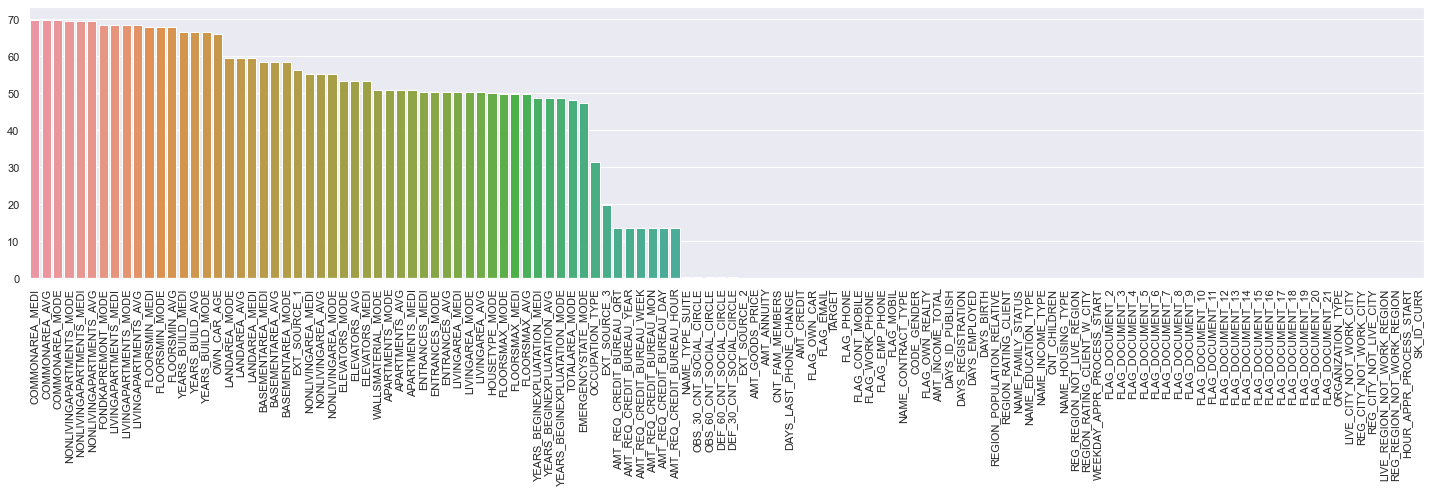

In [6]:
plt.figure(figsize=(25,5))
null_plot = sns.barplot(null_perc.index,null_perc)
loc, labels = plt.xticks()
null_plot.set_xticklabels(labels, rotation=90)
plt.show()

In [7]:
app_data[null_perc[null_perc > 40].index]

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FLOORSMIN_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MODE,OWN_CAR_AGE,LANDAREA_MODE,LANDAREA_AVG,LANDAREA_MEDI,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_AVG,APARTMENTS_MEDI,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE
0,0.0144,0.0143,0.0144,0.0,0.0000,0.0000,reg oper account,0.0205,0.0220,0.0202,0.1250,0.1250,0.1250,0.6243,0.6192,0.6341,NaN,0.0377,0.0369,0.0375,0.0369,0.0369,0.0383,0.083037,0.0000,0.0000,0.0000,0.0000,0.00,0.00,"Stone, brick",0.0252,0.0247,0.0250,0.0690,0.0690,0.0690,0.0193,0.0198,0.0190,block of flats,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No
1,0.0608,0.0605,0.0497,0.0,0.0039,0.0039,reg oper account,0.0787,0.0790,0.0773,0.3333,0.3333,0.3333,0.7987,0.7960,0.8040,NaN,0.0128,0.0130,0.0132,0.0529,0.0529,0.0538,0.311267,0.0100,0.0098,0.0000,0.0806,0.08,0.08,Block,0.0924,0.0959,0.0968,0.0345,0.0345,0.0345,0.0558,0.0554,0.0549,block of flats,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0203,0.0202,0.0172,0.0,0.0757,0.0753,reg oper account,0.1509,0.0882,0.1484,0.2708,0.0417,0.2708,0.8323,0.8300,0.7125,NaN,0.0094,0.0594,0.0605,0.0887,0.0887,0.0172,0.145570,0.1118,0.1095,0.0125,0.0806,0.22,0.22,"Stone, brick",0.1008,0.2021,0.2040,0.1034,0.0345,0.1034,0.2001,0.0853,0.1965,block of flats,0.4583,0.6042,0.6042,0.9876,0.9876,0.9782,0.2898,No
307507,0.0022,0.0022,0.0022,0.0,0.0000,0.0000,reg oper account,0.0205,0.0220,0.0202,0.1250,0.1250,0.1250,0.6310,0.6260,0.6406,NaN,0.0592,0.0579,0.0589,0.0435,0.0435,0.0451,NaN,0.0000,0.0000,0.0000,0.0000,0.00,0.00,"Stone, brick",0.0252,0.0247,0.0250,0.1034,0.1034,0.1034,0.0261,0.0267,0.0257,block of flats,0.0833,0.0833,0.0833,0.9727,0.9727,0.9727,0.0214,No
307508,0.0124,0.0123,0.0124,0.0,0.0000,0.0000,reg oper account,0.0855,0.0918,0.0841,0.2083,0.2083,0.2083,0.7518,0.7484,0.7583,NaN,NaN,NaN,NaN,0.0862,0.0862,0.0894,0.744026,0.0000,0.0000,0.0000,0.0000,0.00,0.00,Panel,0.1050,0.1031,0.1041,0.2069,0.2069,0.2069,0.9445,0.9667,0.9279,block of flats,0.1667,0.1667,0.1667,0.9816,0.9816,0.9816,0.7970,No
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Stone, brick",0.0126,0.0124,0.0125,0.0690,0.0690,0.0690,0.0062,0.0063,0.0061,block of flats,0.0417,0.0417,0.0417,0.9771,0.9771,0.9772,0.0086,No


In [8]:
app_data.drop(columns=null_perc[null_perc > 40].index,inplace=True)
app_data.drop(columns='SK_ID_CURR',inplace=True)
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Let's start with filling up the NaN values with appropriate value**

In [9]:
app_data.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
NAME_TYPE_SUITE                1292
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_EMP_PHONE                    0
FLAG_MOBIL                        0
dtype: int64

In [10]:
def get_max_occuring_value(series,b=10):
    (n, bins, patches) = plt.hist(series,bins=b)
    index = np.argmax(n)
    return bins[index]

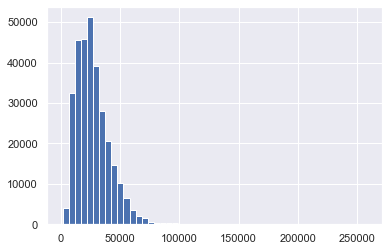

In [11]:
app_data['AMT_ANNUITY'].fillna(value=get_max_occuring_value(app_data['AMT_ANNUITY'],b=50),inplace=True)

In [12]:
percentage_series(app_data['NAME_TYPE_SUITE'])

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [13]:
app_data['NAME_TYPE_SUITE'].fillna(value='Unaccompanied',inplace=True)

In [14]:
percentage_series(app_data['OCCUPATION_TYPE']).head()

Laborers       26.139636
Sales staff    15.205570
Core staff     13.058924
Managers       10.122679
Drivers         8.811576
Name: OCCUPATION_TYPE, dtype: float64

In [15]:
app_data['OCCUPATION_TYPE'].fillna(value='Others',inplace=True)

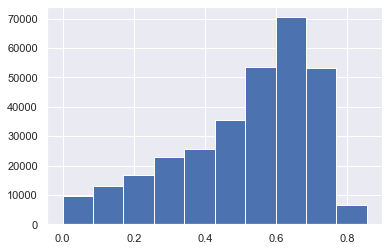

In [16]:
app_data['EXT_SOURCE_2'].fillna(value=get_max_occuring_value(app_data['EXT_SOURCE_2']),inplace=True)

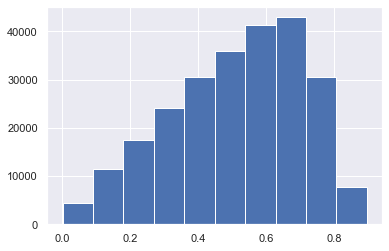

In [17]:
app_data['EXT_SOURCE_3'].fillna(value=get_max_occuring_value(app_data['EXT_SOURCE_3']),inplace=True)

In [18]:
def mode(series):
    copy_series = series.value_counts().copy()
    return copy_series.index[0]

In [19]:
percentage_series(app_data['DEF_60_CNT_SOCIAL_CIRCLE'])

0.0     91.592222
1.0      7.126171
2.0      1.034291
3.0      0.195112
4.0      0.044047
5.0      0.006525
6.0      0.000979
24.0     0.000326
7.0      0.000326
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [20]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=mode(app_data['DEF_60_CNT_SOCIAL_CIRCLE']),inplace=True)

In [21]:
percentage_series(app_data['DEF_30_CNT_SOCIAL_CIRCLE']).head()

0.0    88.526216
1.0     9.242716
2.0     1.736761
3.0     0.388920
4.0     0.082548
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [22]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=mode(app_data['DEF_30_CNT_SOCIAL_CIRCLE']),inplace=True)

In [23]:
percentage_series(app_data['OBS_30_CNT_SOCIAL_CIRCLE']).head()

0.0    53.479722
1.0    15.916669
2.0     9.725603
3.0     6.630559
4.0     4.614506
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [24]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=mode(app_data['OBS_30_CNT_SOCIAL_CIRCLE']),inplace=True)

In [25]:
percentage_series(app_data['OBS_60_CNT_SOCIAL_CIRCLE']).head()

0.0    53.726386
1.0    15.945055
2.0     9.711899
3.0     6.595647
4.0     4.550230
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [26]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=mode(app_data['OBS_60_CNT_SOCIAL_CIRCLE']),inplace=True)

In [27]:
percentage_series(app_data['CNT_FAM_MEMBERS']).head()

2.0    51.496704
1.0    22.063419
3.0    17.105516
4.0     8.031310
5.0     1.131024
Name: CNT_FAM_MEMBERS, dtype: float64

In [28]:
app_data['CNT_FAM_MEMBERS'].fillna(value=mode(app_data['CNT_FAM_MEMBERS']),inplace=True)

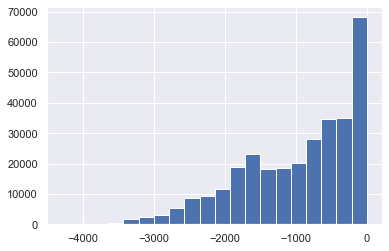

In [29]:
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=get_max_occuring_value(app_data['DAYS_LAST_PHONE_CHANGE'],b=20),inplace=True)

In [30]:
def fill_value_by_probability(series):
    p_amt = percentage_series(series)/100
    return np.random.choice(p_amt.index,1,p=p_amt.values)[0]

In [31]:
app_data['AMT_GOODS_PRICE'].fillna(value=fill_value_by_probability(app_data['AMT_GOODS_PRICE']),inplace=True)

In [32]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'])

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [33]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=mode(app_data['AMT_REQ_CREDIT_BUREAU_HOUR']),inplace=True)

In [34]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_DAY'])

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [35]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=mode(app_data['AMT_REQ_CREDIT_BUREAU_DAY']),inplace=True)

In [36]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'])

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [37]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=mode(app_data['AMT_REQ_CREDIT_BUREAU_WEEK']),inplace=True)

In [38]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_MON']).head()

0.0    83.548753
1.0    12.461653
2.0     2.024873
3.0     0.748519
4.0     0.404523
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [39]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=fill_value_by_probability(app_data['AMT_REQ_CREDIT_BUREAU_MON']),inplace=True)

In [40]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_QRT']).head()

0.0    80.986270
1.0    12.730458
2.0     5.418208
3.0     0.645508
4.0     0.178953
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [41]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=fill_value_by_probability(app_data['AMT_REQ_CREDIT_BUREAU_QRT']),inplace=True)

In [42]:
percentage_series(app_data['AMT_REQ_CREDIT_BUREAU_YEAR']).head()

0.0    26.993669
1.0    23.837183
2.0    18.869740
3.0    12.642485
4.0     7.787452
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [43]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=fill_value_by_probability(app_data['AMT_REQ_CREDIT_BUREAU_YEAR']),inplace=True)

### Handling Outliers

In [44]:
app_data_wo = app_data.copy()
app_data_wo.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.379564,5.385197e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145732e-01,0.533952,1.417523,0.142944,1.400626,0.099717,-962.856355,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.487906,3.693022e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908947e-01,0.180542,2.398395,0.446033,2.377224,0.361735,826.808244,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.92

In [45]:
def get_series_greater_than_quantile_value(series,quant):
    return series[series.values > np.quantile(series.values,q=quant)]

In [46]:
def boxplot_matrix(dataframe,m,n):
    f, axes = plt.subplots(m, n,figsize = (20, 10))
    for i,j in enumerate(dataframe):
        sns.boxplot(dataframe[j], ax=axes[int(i/n),int(i%n)])
    plt.tight_layout()

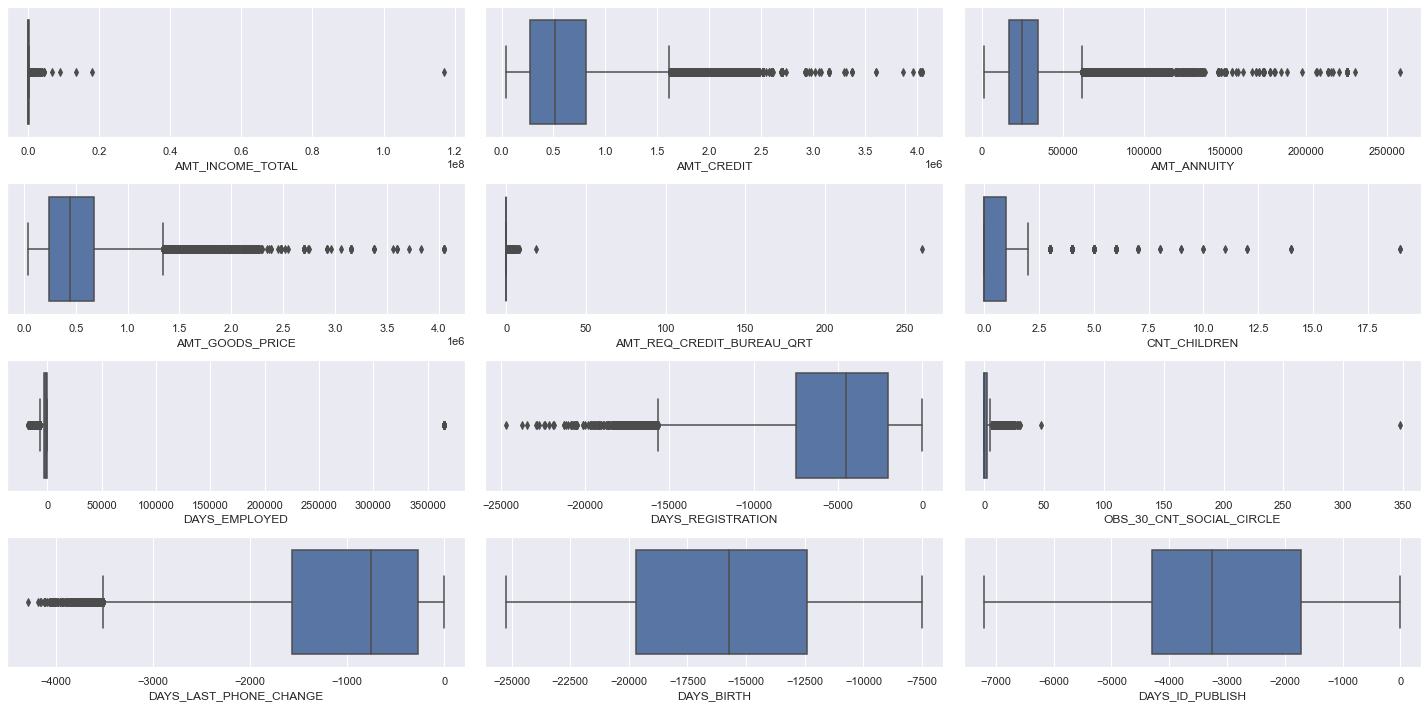

In [47]:
outlier_df = app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_QRT','CNT_CHILDREN','DAYS_EMPLOYED','DAYS_REGISTRATION','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH']]
boxplot_matrix(outlier_df,4,3)

In [48]:
app_data.drop(index=get_series_greater_than_quantile_value(app_data['AMT_INCOME_TOTAL'],quant=0.99).index,inplace=True)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['AMT_CREDIT'],quant=0.99).index,inplace=True)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['AMT_ANNUITY'],quant=0.99).index,inplace=True)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['AMT_GOODS_PRICE'],quant=0.99).index,inplace=True)
app_data.drop(index=app_data[app_data['AMT_REQ_CREDIT_BUREAU_QRT'] >= 7.0].index,inplace=True)

In [49]:
app_data.drop(index=app_data[app_data['CNT_CHILDREN'] >= 7].index,inplace=True)
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].apply(lambda x: -1*x)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['DAYS_REGISTRATION'],quant=0.99).index,inplace=True)
app_data.drop(index=app_data[app_data['DAYS_EMPLOYED'] == 365243].index,inplace=True)
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: -1*x)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['DAYS_EMPLOYED'],quant=0.99).index,inplace=True)
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -1*x)
app_data.drop(index=get_series_greater_than_quantile_value(app_data['DAYS_LAST_PHONE_CHANGE'],quant=0.99).index,inplace=True)
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].apply(lambda x: -1*x)
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].apply(lambda x: -1*x)
app_data.drop(index=app_data[app_data['OBS_30_CNT_SOCIAL_CIRCLE'] > 6].index,inplace=True)

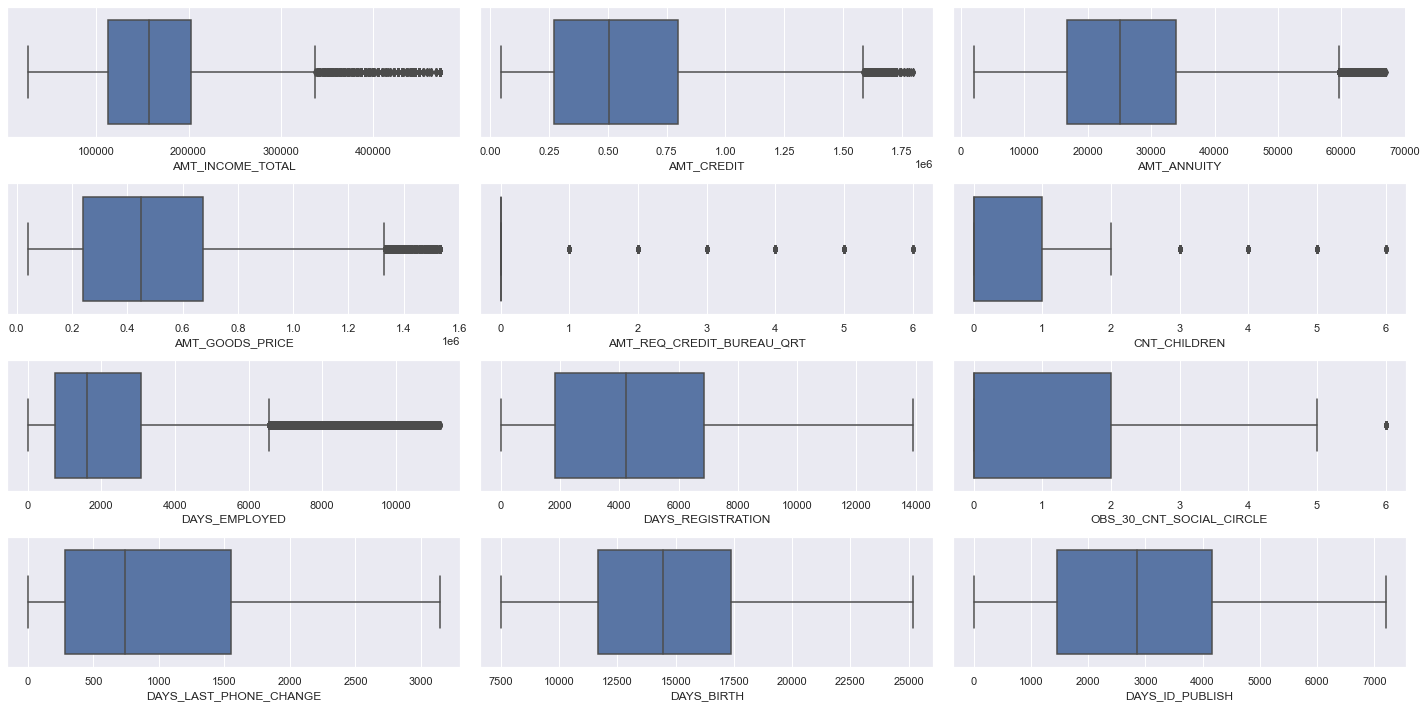

In [50]:
outlier_df = app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_QRT','CNT_CHILDREN','DAYS_EMPLOYED','DAYS_REGISTRATION','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH']]
boxplot_matrix(outlier_df,4,3)

In [51]:
def barplot_matrix(dataframe,m,n):
    f, axes = plt.subplots(m, n,figsize = (20, 10))
    for i in range(0,len(dataframe.index)):
        dataframe[['Old STD','New STD']].iloc[i].plot(ax=axes[int(i/n),int(i%n)],kind='bar',title=dataframe.iloc[i].name,color=plt.cm.Pastel2(np.arange(len(dataframe))))
    plt.tight_layout()

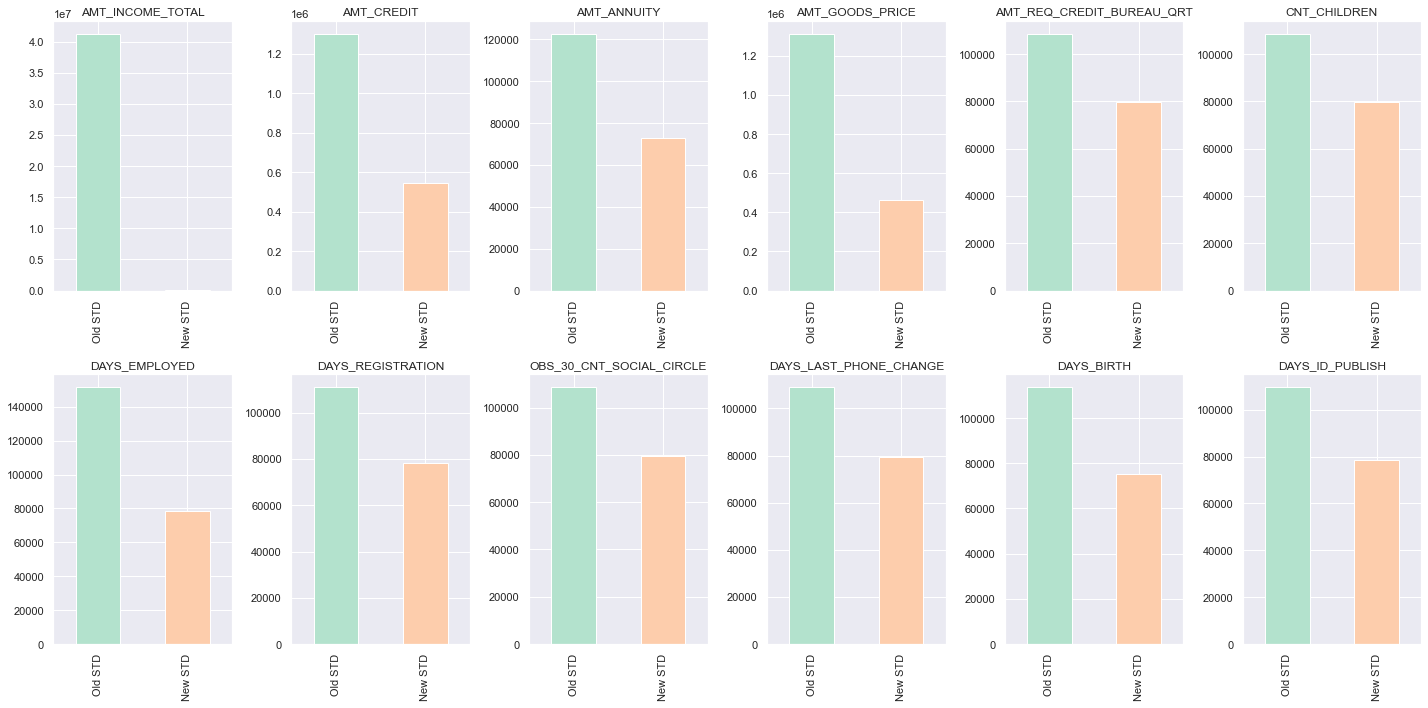

In [52]:
std_values = pd.concat([app_data_wo.describe().std(),app_data.describe().std()],axis=1,names=['Old STD','New STD'])
std_values.rename(columns = {0:'Old STD',1:'New STD'},inplace=True)
std_values = std_values.loc[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_QRT','CNT_CHILDREN','DAYS_EMPLOYED','DAYS_REGISTRATION','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH']]
barplot_matrix(std_values,2,6)


### EDA - Payment Difficulty

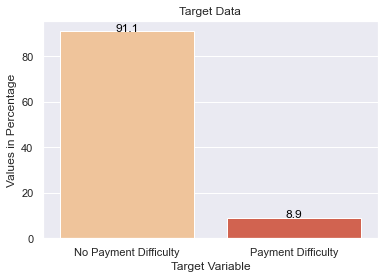

In [54]:
bar = sns.barplot(x=['No Payment Difficulty','Payment Difficulty'],y=percentage_series(app_data['TARGET']).values,palette="OrRd")
for index, row in percentage_series(app_data['TARGET']).iteritems():
    bar.text(index,row, round(row,2), color='black', ha="center")

plt.xlabel('Target Variable')
plt.ylabel('Values in Percentage')
plt.title('Target Data')
plt.show()

**Top 10 feature which are correlated to TARGET feature**

In [55]:
app_data.corr()['TARGET'].sort_values(ascending=False).head(11)

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.064086
REGION_RATING_CLIENT           0.061717
REG_CITY_NOT_WORK_CITY         0.042800
REG_CITY_NOT_LIVE_CITY         0.042190
FLAG_DOCUMENT_3                0.041798
DEF_30_CNT_SOCIAL_CIRCLE       0.034848
DEF_60_CNT_SOCIAL_CIRCLE       0.032989
LIVE_CITY_NOT_WORK_CITY        0.023622
FLAG_WORK_PHONE                0.020612
AMT_REQ_CREDIT_BUREAU_YEAR     0.015308
Name: TARGET, dtype: float64

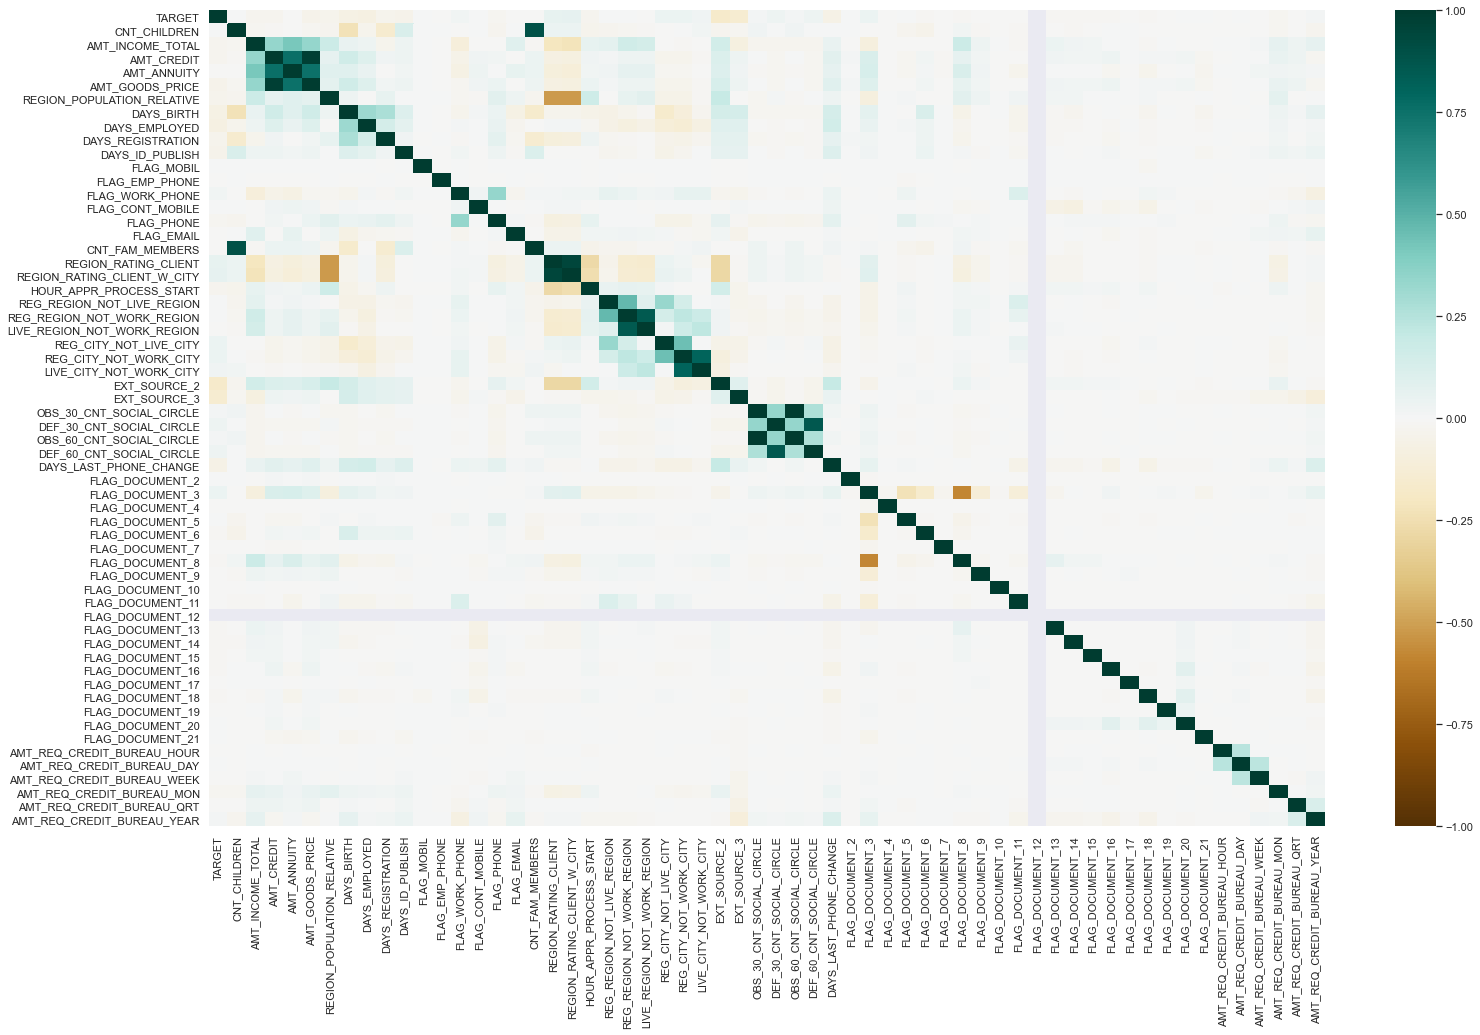

In [56]:
plt.figure(figsize=(25,15))
sns.heatmap(app_data.corr(),cmap='BrBG',vmin=-1,vmax=1)
plt.show()

In [57]:
app_data.drop('FLAG_DOCUMENT_12',axis=1,inplace=True)

In [58]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
range = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=range)

<AxesSubplot:xlabel='AMT_INCOME_RANGE', ylabel='count'>

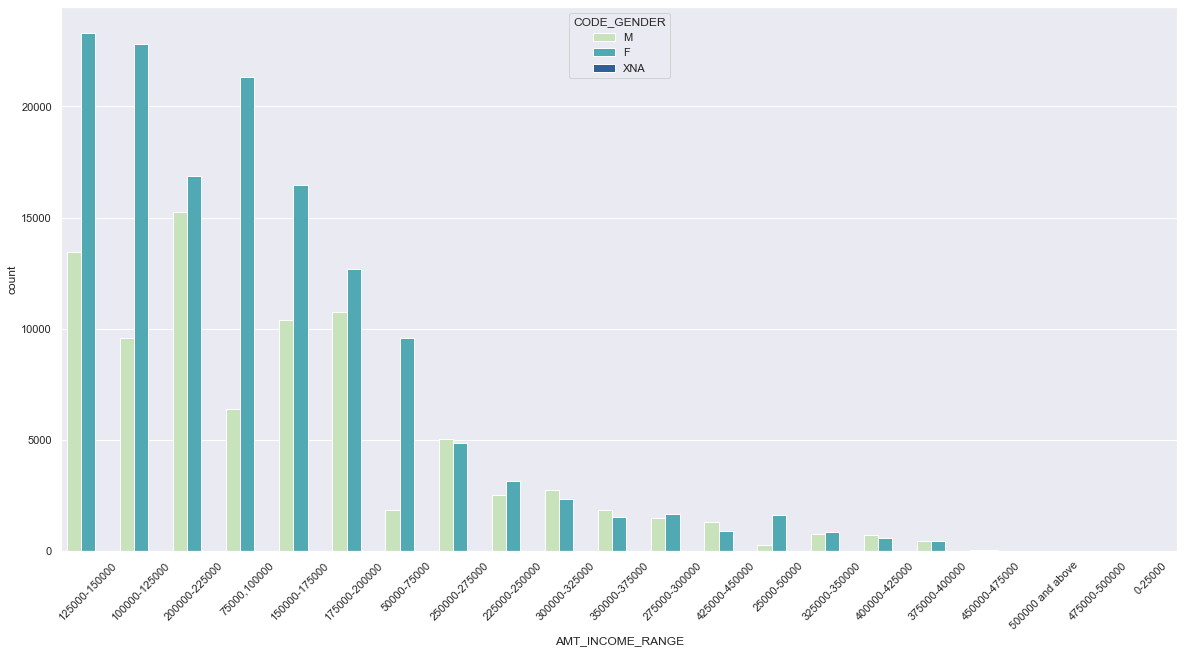

In [59]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(data = app_data, x= 'AMT_INCOME_RANGE', order=app_data['AMT_INCOME_RANGE'].value_counts().index,hue = 'CODE_GENDER',palette='YlGnBu') 

<AxesSubplot:>

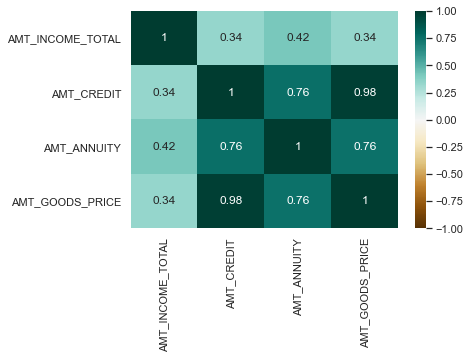

In [60]:
amount_df = app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
sns.heatmap(amount_df.corr(),cmap='BrBG',vmin=-1,vmax=1,annot=True)

In [61]:
app_data['CODE_GENDER'].value_counts()

F      140837
M       84634
XNA         2
Name: CODE_GENDER, dtype: int64